# EMPIRICAL STUDY OF THE KNAPSACK PROBLEM

**2. Knapsack**

The following assignment outlines various algorithms for tackling the Knapsack problem:

**Given a collection of items, each with a weight and value, determine the optimal combination of objects to include in a knapsack so that the total weight does not exceed the knapsack's capacity and the total value is maximized.**




**3. Dataset**

The Knapsack dataset can be downloaded from Kaggle, courtesy of Chirag Chauhan, at the following link: https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download

The dataset is a .csv file that is structured into five columns:

* **Weights:** This column provides a list of weights for different items.

* **Prices:** This column gives the value or price associated with each item.

* **Capacity:** This is the maximum weight capacity of the knapsack for the given row.

* **Best picks:** This column provides the optimal items to pick for maximum price without exceeding the knapsack's weight capacity.

* **Best price:** This is the total value or price of the best picks for the given capacity.

**Importing necessary libraries for data analysis and manipulation:**

In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

**Reading the dataset**

The dataset can be accessed through this link:
https://raw.githubusercontent.com/fredjkhar/knapsack/main/data/knapsack_5_items.csv

In [ ]:
url = "https://raw.githubusercontent.com/fredjkhar/knapsack/main/data/knapsack_5_items.csv"

dataset = pd.read_csv(url)

The dataset columns are `Weights`, `Prices`, `Capacity`, `Best picks`, and `Best price`.

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

Let us visualize the first 10 rows:

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Pretreatment step**

The columns 'Weights', 'Prices', and 'Best Picks' are currently in string format and need to be converted to lists of integers or real numbers. To achieve this, we define `string_to_list()`:

In [ ]:
# Convert a string representation of a list into a list of floats.
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Now we will apply the logic to perform the conversion. But first we must ensure that the dataset does not contain NULL values using the Pandas DataFrame `dropna()` dethod.

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-7-833fb421dc49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
<ipython-input-7-833fb421dc49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
<ipython-input-7-833fb421dc49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

**4. Generate and Test**

The "Generate and Test" algorithm aims to produce every potential solution and determine the best one. For our scenario, we'll create all combinations of knapsack items. An item that is put in the knapsack gets a value of 1; otherwise, it's 0. In total, there are 2^5 = 32 possible combinations to consider for each row: [0,0,0,0,0], [0,0,0,0,1], ... ,[1,1,1,1,1].

Each combination's weight is then compared to the knapsack's maximum capacity. Combinations exceeding this weight are invalid and discarded during the constraint satisfaction phase. We then compute the total value of the valid combinations. If a combination has a higher value than previously observed, we update our best solution. This process is repeated for all combinations.

**-> The Generate and Test algorithm should return optimal results**

The cost function, F, represents the total weight of items in the knapsack. The algorithm aims to maximize F's value while staying within the weight constraint during the optimization phase.

We will repeat this logic for all rows.




**The implementation of Generate and Test Algorithm**

To test every possible solution I need to find a way to generate all possible solutions. For that I went with a list of five integers initially set to zero ([0,0,0,0,1]) and I looked for a way to generate all 32 possible combinations of 0s and 1s. I prepared the following function:

In [ ]:
def get_binary_list(n):
    combination = [0] * 5 # Initializes a list of five integers initially set to 0

    # represent n in a binary format where each digit is an item of the list
    # e. g. if n = 5 then combination = [0,0,1,0,1] which is 00101 or 5 in binary form
    combination[0] = n // 16
    tmp = n % 16
    combination[1] = tmp // 8
    tmp = tmp % 8
    combination[2] = tmp // 4
    tmp = tmp % 4
    combination[3] = tmp // 2
    tmp = tmp % 2
    combination[4] = tmp // 1

    return combination

Here, `get_binary_list(17)` will return its binary representation (which is [1,0,0,0,1]), but in a list.

In [ ]:
print(get_binary_list(17))

[1, 0, 0, 0, 1]


All we need is to call get_binary_list(i) in a loop to get all possible combinations

In [ ]:
def gen_and_test(data):
  best_solution = []
  best_solution_price = 0

  # Loop through all possible combinations
  for i in range(32):
    solution = get_binary_list(i) # Get the binary representation of i in a list format
    solution_weight = 0
    solution_price = 0

    for i in range(5):
      solution_weight = solution_weight + solution[i] * data['Weights'][i]
      solution_price = solution_price + solution[i] * data['Prices'][i]

    if solution_weight > data['Capacity']: # If the solution does not respect the capacity constraint, then skip it
      continue

    if solution_price > best_solution_price:
      best_solution_price = solution_price
      best_solution = solution

  return best_solution_price, best_solution

Let us test `gen_and_test()` using the fifth row in the dataset:

In [ ]:
print(dataset.iloc[5])
best_price, best_pick = gen_and_test(dataset.iloc[5])
print("\nBest pick :", best_pick)
print("Best price :", best_price)

Weights       [27.0, 10.0, 25.0, 25.0, 7.0]
Prices         [13.0, 19.0, 7.0, 16.0, 3.0]
Capacity                                 66
Best picks        [1.0, 1.0, 0.0, 1.0, 0.0]
Best price                             48.0
Name: 5, dtype: object

Best pick : [1, 1, 0, 1, 0]
Best price : 48.0


Now, let us process the whole dataset

In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)

In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


`Accuracy of best prices found is 1.0`

As previously mentioned, this approach returns the optimal results. The "Generate and Test" algorithm systematically evaluates all potential combinations of items in the knapsack.

------------------------------------------------------------------------------------

**5. Greedy Search**

In this section, we will investigate discovering the optimal combinations of items in a knapsack by employing the greedy search algorithm. The reason for utilizing this method stems from the fact that the "Generate and Test" search finds the optimal results but isn't practical for significant datasets. For example, if the list of items increased from 5 to 50 and the total number of scenarios increased from 10,000 to 1,000,000, then the algorithm would need to examine over 10^20 possibilities, which is incredibly vast even for supercomputers (presumably). Greedy search takes a distinct path. Instead of assessing every scenario, we formulate a strategy.

The stategy I will use for this algorithm is as
follows:
* Add items to the knapsack **starting with the lightest and working up to the heaviest**, stopping once the knapsack is full.
* If two items have the same weight, select the one with the higher price to place in the knapsack.
* **As an extra step**, if, after placing the four lightest items, the weight constraint is not met when trying to add the heaviest (last) one to knapsack, attempt to substitute the second heaviest (or the fourth item in the sorted list) with the heaviest item (last item in the sorted list). If the combined weight of the new combination exceeds the allowed weight, abort the attempt. Otherwise, substitute the second heaviest item with the heaviest one.

The additional step is an attempt to ensure the "uniqueness" of my strategy.

In [ ]:
def greedy(data):
    capacity = data['Capacity']
    weights = data['Weights']
    prices = data['Prices']

    combination = []
    total_price = 0
    total_weight = 0

    # Sort the pairs by weight in ascending order (in case of ties, sort by price in descending order. Hence the - sign)
    # e.g [(1, 2), (2, 3), (2, 1)] becomes [(1, 2), (2, 3), (2, 1)]

    # REFRENCE [11] - Sorting list based on values from another list
    sorted_pairs = list(zip(weights, prices))
    sorted_pairs = sorted(sorted_pairs, key=lambda x: (x[0], -x[1]))

    # If the weight of the item is less than the remaining capacity, append 1 to the knapsack
    # Otherwise, append a 0 to the combination list
    # e.g if capacity = 5 and sorted_pairs = [(1, 2), (3, 3), (3, 1)] then combination = [1, 1, 0]
    # We end up with a list of 0s and 1s
    for weight, price in sorted_pairs:
        if total_weight + weight > capacity:
            combination.append(0) # Since the weights are sorted in ascending order, we can keep adding 0s to the combination list
        else:
            total_weight += weight
            total_price += price
            combination.append(1)

    # if combination contains 4 items, check if the 4th item can be substituted by the 5th item without exceeding the capacity
    if combination[3] == 1 and combination[4] == 0:
        fourth_weight, fourth_price = sorted_pairs[3]
        heaviest_weight, heaviest_price = sorted_pairs[4]

        if total_weight - fourth_weight + heaviest_weight <= capacity:
            combination[3] = 0
            combination[4] = 1
            total_price = total_price - fourth_price + heaviest_price

    return total_price, combination

Let us test the algorithm using the fifth row in the dataset:

In [ ]:
print(dataset.iloc[5])
best_price, best_pick = greedy(dataset.iloc[5])
print("\nBest pick :", best_pick)
print("Best price :", best_price)

Weights       [27.0, 10.0, 25.0, 25.0, 7.0]
Prices         [13.0, 19.0, 7.0, 16.0, 3.0]
Capacity                                 66
Best picks        [1.0, 1.0, 0.0, 1.0, 0.0]
Best price                             48.0
Name: 5, dtype: object

Best pick : [1, 1, 1, 0, 0]
Best price : 38.0


We notice that the items (weight, price) picked by the greedy search are : ((7.0, 3.0), (10.0, 19.0), (25.0, 16.0)) with a total weight of 42.0 and total price of 38.0. Since the capacity is 66 and 42 + 25 > 66, the second heaviest item could not be added.

In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)

In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions_greedy))

Accuracy of best prices found is 0.5212065998582852


`Accuracy of best prices found is 0.5212065998582852`

The greedy search consistently achieves an accuracy of 52.12%. This is because its strategy remains constant and does not involve probabilistic calculations. While a drop in accuracy was anticipated, it was unexpected to this degree. This diminished accuracy can be attributed to the chosen strategy.
There are alternative strategies, like the weight/price ratio, that can yield more accurate results.

------------------------------------------------------------------------------------------------

**6. Simulated Annealing (Recuit Simulé)**

To introduce the Simulated Annealing approach, it is first necessary to understand the concept of annealing.
Annealing is a heat treatment process that alters the physical and, at times, the chemical properties of a material to increase its ductility and reduce its hardness, thereby rendering it more workable **[2]**. The process of annealing is extensively applied in the metallurgical industry.

In the context of optimization algorithms, the Simulated Annealing algorithm draws inspiration from the annealing process in metallurgy. The gradual cooling of an initially hot material to reduce its defects serves as an analogy for the gradual decreasing probability of accepting worse solutions as the algorithm is run.

This is due to the fact that when a material, once heated, reaches the molten state, the particles that make the material are randomly displaced.

Consequently, the material, as a system, loses its structure.

As the material cools slowly, these particles find new positions. As the temperature decreases, more particles settle into a position of lower energy. Once the material is fully cooled, each particle assumes its new or previous position **[3]**.

Crucially, the movement of each particle to its new position is random. Yet this process is proven to be effective in increasing the size of the crystals and reducing the defects in a material [cours].  

The simulated annealing is thus a probabilistic optimization method inspired by the annealing process in metallurgy.

**The implementation**

To implement the Simulated Annealing algorithm, we first must define few properties:

* **Temperature T**: The temperature serves as an analogy for the system's willingness to accept inferior solutions.
First, the material is heated to a high temperature `T(max)`, marking the starting point of our algorithm. The cooling process is then initiated and continues until the temperature reaches `T(min)`. This establishes the beginning and end states for our algorithm. In our algorithm, we will consider `N` as the number of iterations without take into account `T(min)`.

* **Fitness function E**: This function measures the quality or 'fitness' of a solution. For our problem, it sums the prices of selected items in the knapsack, representing the overall value achieved. We'll denote this function as `E` (energy). The initial configuration of items and the resultant total value `E` can be determined using the **Greedy Search** implemented above: `E, comb = greedy(data)`.

* **Cooling rate cooling_rate**: As the system cools, the rate at which particles move decreases, as temperatures drop. We'll model this using a cooling rate. Suppose, that `cooling_rate = 0.95`. We will multiply `T` by `cooling_rate` to simulate the cooling phenomena.







**Acceptance criteria**

The acceptance of new solutions doesn't rely solely on better fitness. Instead, Simulated Annealing allows for a probabilistic acceptance, which can include worse solutions, based on the following test:
* if `E_delta = E - E_new < 0`, the new (better) solution has a higher fitness value, then accept the new solution
* otherwise, generate a random value `r` between `0` and `1`
* calculate `e = exp(-E_delta/T)` where `E_delta = E - E_new` and `T` is the actual temperature of the system.
* if `r < e`, then the worse solution is accepted

As the temperature T reduces over time, the value of e decreases, limiting the acceptance of worse solutions. This emulates the process of annealing: as the material cools, it becomes less tolerant of unfavorable states.

In [ ]:
def accept_solution(temperature, delta_E):
    # If the new solution is better than the current one, accept it
    if (delta_E < 0):
        return True
    # If the new solution is worse than the current one, accept it with a probability of e^(-E_delta / actual_temperature)
    else:
        r = random.uniform(0, 1)
        e = math.exp(-delta_E / temperature)
        return r < e

The following function performs the random modification of one of the items in the combination. It takes as input a combination, and returns is with a mutated element.

In [ ]:
def generate_candidate_solution(combination):
    comb_copy = combination.copy()
    random_index = random.randint(0, 4)
    if comb_copy[random_index] == 1:
        comb_copy[random_index] = 0
    else:
        comb_copy[random_index] = 1
    return comb_copy

In [ ]:
# Examples
print(generate_candidate_solution([0,0,1,1,0]))
print(generate_candidate_solution([1,0,0,1,1]))

[0, 1, 1, 1, 0]
[1, 0, 0, 1, 0]


In [ ]:
def simulated_annealing(data, N,  initial_temperature, cooling_rate):
    capacity = data['Capacity']
    prices = data['Prices']
    weights = data['Weights']

    T = initial_temperature
    E, solution = greedy(data) # Get the initial solution by using the greedy algorithm

    for i in range(N):
        new_E = 0
        new_weight = 0
        new_solution = generate_candidate_solution(solution) # Generate a new solution by permutating two items in the knapsack

        for i in range(5):
            new_E += new_solution[i] * prices[i]
            new_weight += new_solution[i] * weights[i]

        if new_weight > capacity: # If the new solution does not respect the capacity constraint, discard it
            continue

        # We want to maximize the fitness, so if the new solution has a higher fitness, delta_E will be negative
        delta_E = E - new_E

        # If the new solution is better than the current one, accept it
        if accept_solution(T, delta_E):
            solution = new_solution
            E = new_E

        # Cool down the temperature
        T *= cooling_rate

    return E, solution


We will consider a list of cooling rates when executing the algorithm

In [ ]:
cooling_rates = [0.995, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.2]
for i in range(len(cooling_rates)):
    solutions_sa = []
    for _, row in dataset.iterrows():
        target = row['Best price']
        solution, indexes = simulated_annealing(row, N = 50, initial_temperature=1, cooling_rate= cooling_rates[i])
        solutions_sa.append(1 if target == solution else 0)
    print("Simulated Annealing Accuracy for r =", cooling_rates[i],"is", np.mean(solutions_sa))

Simulated Annealing Accuracy for r = 0.995 is 0.6048183014475149
Simulated Annealing Accuracy for r = 0.95 is 0.6075513715963154
Simulated Annealing Accuracy for r = 0.9 is 0.6021864561190404
Simulated Annealing Accuracy for r = 0.8 is 0.5985423625873064
Simulated Annealing Accuracy for r = 0.7 is 0.5970239902824173
Simulated Annealing Accuracy for r = 0.6 is 0.6000607348921956
Simulated Annealing Accuracy for r = 0.5 is 0.5960117420791579
Simulated Annealing Accuracy for r = 0.2 is 0.5970239902824173


The first observation is that the accuarcy of results of the Simulated Annealing Search is significantly higher based on the following cooling rates:

When N=10:

`Simulated Annealing Accuracy for r = 0.995 is 0.5685798157708271`

`Simulated Annealing Accuracy for r = 0.95 is 0.5719202348415832`

`Simulated Annealing Accuracy for r = 0.9 is 0.575868002834295`

`Simulated Annealing Accuracy for r = 0.8 is 0.5784998481627696`

`Simulated Annealing Accuracy for r = 0.7 is 0.577588824779836`

`Simulated Annealing Accuracy for r = 0.6 is 0.5771839254985323`

`Simulated Annealing Accuracy for r = 0.5 is 0.5770827006782063`

`Simulated Annealing Accuracy for r = 0.2 is 0.5780949488814657`

* The accuracies observed here are relatively consistent across all cooling rates.

When N=50:

`Smulated Annealing Accuracy for r = 0.995 is 0.6072476971353375`

`Simulated Annealing Accuracy for r = 0.95 is 0.6057293248304484`

`Simulated Annealing Accuracy for r = 0.9 is 0.6053244255491447`

`Simulated Annealing Accuracy for r = 0.8 is 0.5979350136653507`

`Simulated Annealing Accuracy for r = 0.7 is 0.5949994938758983`

`Simulated Annealing Accuracy for r = 0.6 is 0.597327664743395`

`Simulated Annealing Accuracy for r = 0.5 is 0.5954043931572022`

`Simulated Annealing Accuracy for r = 0.2 is 0.5958092924385059`

* Here, while higher cooling rates tend to produce marginally better accuracy, the variation isn't considerably pronounced.

When N=100:

`Simulated Annealing Accuracy for r = 0.995 is 0.6193946755744508`

`Simulated Annealing Accuracy for r = 0.95 is 0.6084623949792489`

`Simulated Annealing Accuracy for r = 0.9 is 0.6026925802206701`

`Simulated Annealing Accuracy for r = 0.8 is 0.599352161149914`

`Simulated Annealing Accuracy for r = 0.7 is 0.5966190910011134`

`Simulated Annealing Accuracy for r = 0.6 is 0.5985423625873064`

`Simulated Annealing Accuracy for r = 0.5 is 0.5944933697742687`

`Simulated Annealing Accuracy for r = 0.2 is 0.5960117420791579`

* Once again, a slightly higher accuracy can be seen with greater cooling rates.

It's intriguing to observe that when the cooling_rate decreases, the accuracy decreases too. This is not something I expected, since lower cooling rates mean less worse solutions are explored/accepted. This could be due to the suboptimal results provided by the greedy algorithm.

**7. Genetic Algorithm**



The Genetic Algorithm draws inspiration from nature's evolutionary process. Within the context of the Knapsack problem, the population consists of various potential solutions. These solutions experience tournaments/selection, crossover, and mutations over several iterations/generations. Through this recurring cycle of selection, crossover, and mutation, the algorithm aims to optimal or nearly optimal solutions **[5]**.

In [37]:
# REFERENCE [7] - The Knapsack problem and Genetic Algorithm - Computerphile

def calculate_fitness(ind, prices, weights, capacity):
  fitness = 0
  weight = 0

  for i in range(5):
    weight += ind[i] * weights[i]
    fitness += ind[i] * prices[i]

  # If fitness is greater than the capacity, return 0
  return fitness if weight <= capacity else 0

def crossover(parent1, parent2, cross_rate):
  # If the random number is greater than the cross_rate, return the parents
  if random.uniform(0, 1) >= cross_rate:
    return parent1, parent2

  # Otherwise, perform crossover (REFERENCE [4] - (List Slicing))
  crossover_point = random.randint(0, 4)
  child1 = parent1[:crossover_point] + parent2[crossover_point:]
  child2 = parent2[:crossover_point] + parent1[crossover_point:]

  return child1, child2

def mutation(child, mut_rate):
  for i in range(5):
    random_rate = random.uniform(0, 1)
    if random_rate < mut_rate:
      # If random value is less than mutation rate, flip the bit
      child[i] = 1 if child[i] == 0 else 0

  return child

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):
    prices = data['Prices']
    weights = data['Weights']
    capacity = data['Capacity']

    # Initialize the population with random solutions
    population = [[random.randint(0,1)  for i in range(5)] for j in range(population_size)]

    for n in range(num_generations):
      new_population = []

      while len(new_population) < population_size:
        parents = []
        tournament = []
        # Select two parents - From each tournament, select the best solution based on fitness
        for i in range(2): # number of tournaments
          for i in range(tournament_size):
            tournament.append(random.choice(population))
          # (REFERENCE [6] - max function using key and lambda expression)
          parents.append(max(tournament, key =lambda s: calculate_fitness(s, prices, weights, capacity)))

        # Crossover
        child1, child2 = crossover(parents[0], parents[1], cross_rate)

        # Mutating child1 and child2 using random modification
        child1 = mutation(child1, mut_rate)
        child2 = mutation(child2, mut_rate)

        new_population.append(child1)
        new_population.append(child2)

      population = new_population

    # Find the best solution in the final population
    best_solution = max(population, key =lambda s: calculate_fitness(s, prices, weights, capacity))
    best_solution_price = calculate_fitness(best_solution, prices, weights, capacity)

    return best_solution_price, best_solution

We will reiterate the experience across different mutation and crossover rates:
`exp 1: mut_rate = 0.1, cross_rate = 0.7`
`exp 2: mut_rate = 0.1, cross_rate = 0.5`
`exp 3: mut_rate = 0.01, cross_rate = 0.7`
`exp 4: mut_rate = 0.2, cross_rate = 0.9`

Note that each experience takes about 4 min and 30 seconds to complete. The results are provided below

In [ ]:
mut_rates = [0.1, 0.1, 0.01, 0.2]
cross_rates = [0.7, 0.5, 0.7, 0.9]

for i in range(len(mut_rates)):
    solutions_ga = []
    for _, row in dataset.iterrows():
        target = row['Best price']
        solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = mut_rates[i], cross_rate = cross_rates[i], tournament_size = 5)
        solutions_ga.append(1 if target == solution else 0)
    print("Genetic Algorithm Accuracy for exp", i , "where mut_rate =", mut_rates[i], "and cross_rate = ", cross_rates[i], "is", np.mean(solutions_ga))

The results are the following

`Genetic Algorithm Accuracy for exp 0 where mut_rate =  0.1 and cross_rate =  0.7 is 0.9987853021560886`

`Genetic Algorithm Accuracy for exp 1 where mut_rate =  0.1 and cross_rate =  0.5 is 0.990889766170665`

`Genetic Algorithm Accuracy for exp 2 where mut_rate =  0.01 and cross_rate =  0.7 is 0.9403785808280191`

`Genetic Algorithm Accuracy for exp 3 where mut_rate =  0.2 and cross_rate =  0.9 is 1.0`

* **Exp 0**: The combination of (mut_rate = 0.1) and (cross_rate= 0.7) offers a high accuracy, almost reaching a perfect score.
* **Exp 1**: Adjusting the crossover rate to 0.5 (while keeping the mutation rate at 0.1) results in a slight decrease in performance.
* **Exp 2**:  A lower mutation rate of 0.01 combined with a crossover rate of 0.7 leads to a significant drop in accuracy to about 94.04%.
* **Exp 3**: The combination of a higher mutation rate of 0.2 and a high crossover rate of 0.9 results in a perfect accuracy of 100%. This suggests that this combination allows the algorithm to explore and exploit the solution space effectively, leading to an optimal solution.

**8. Results comparison and discussions**

***a. Test and Generate vs Greedy Search***

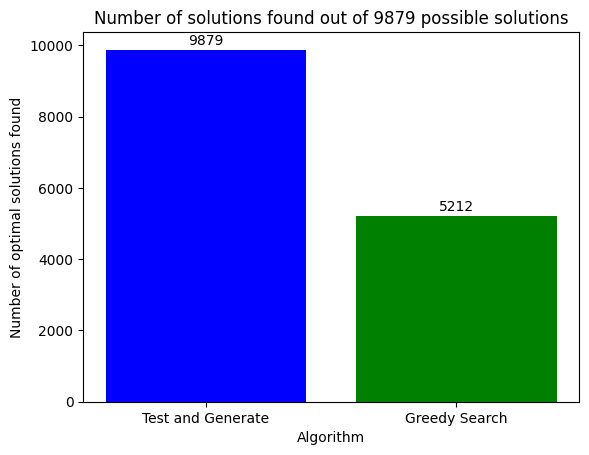

In [36]:
# REFERENCE 9 - Bar plot
algorithms = ["Test and Generate", "Greedy Search"]
nbr_solutions = [9879, 5212]

# REFERENCE 10 - Displaying values on top of bars
bars = plt.bar(algorithms, nbr_solutions, color=["blue", "green"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')
plt.xlabel("Algorithm")
plt.ylabel("Number of optimal solutions found")
plt.title("Number of solutions found out of 9879 possible solutions")
plt.show()

* Test and Generate Algorithm: The search found all optimal solutions (9879 out of 9879), resulting in a 100% accuracy.

* Greedy Search Algorithm: In contrast, the Greedy Search algorithm found 5,212 optimal solutions out of (9879), which is nearly half the number of optimal solutions compared to the Test and Generate algorithm.

***b. Simulated Annealing***

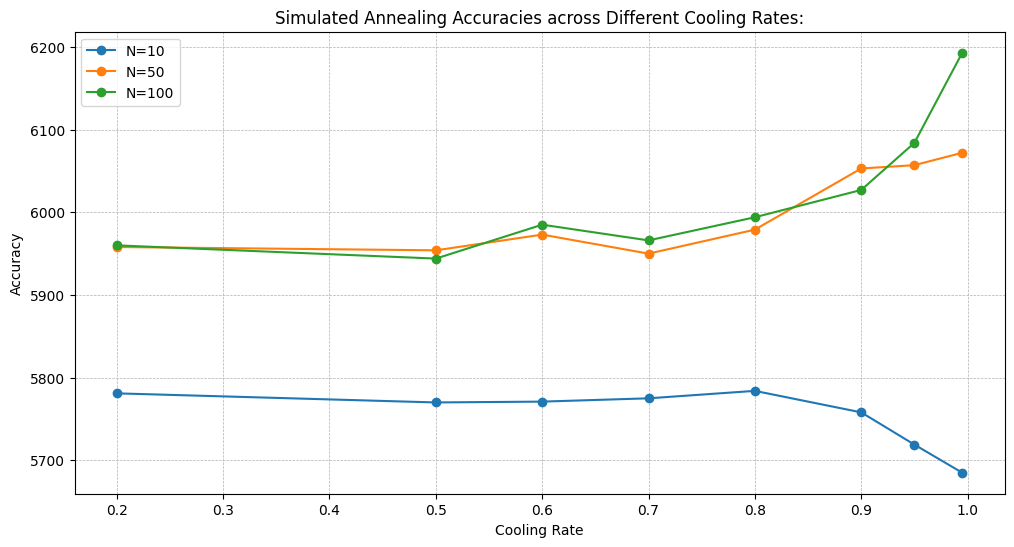

In [35]:
# REFERENCE [8] - Line Plot
cooling_rates = [0.995, 0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.2]
accuracies_N10 = [5685, 5719, 5758, 5784, 5775, 5771, 5770, 5781]
accuracies_N50 = [6072, 6057, 6053, 5979, 5950, 5973, 5954, 5958]
accuracies_N100 = [6193, 6084, 6027, 5994, 5966, 5985, 5944, 5960]

plt.figure(figsize=(12,6))
plt.plot(cooling_rates, accuracies_N10, marker='o', label='N=10')
plt.plot(cooling_rates, accuracies_N50, marker='o', label='N=50')
plt.plot(cooling_rates, accuracies_N100, marker='o', label='N=100')

plt.title("Simulated Annealing Accuracies across Different Cooling Rates:")
plt.xlabel("Cooling Rate")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


**For N=10:**

* The accuracy ranges from approximately 56.86% to 57.81%.
* The difference in accuracy across different cooling rates is marginal, with the highest accuracy achieved at r = 0.8.
* The accuracies are relatively stable across the board, suggesting that the algorithm's performance is somewhat invariant to the choice of cooling rate in this case.
* Although when the cooling rate is 0.995, the accuray is a bit lower that the rest of the measures.

**For N=50:**

* The accuracy ranges between approximately 59.50% to 60.72%.
* There is a subtle trend indicating that higher cooling rates tend to give slightly better accuracies, but this trend isn't very pronounced.
* The performance drops are noticeable at r = 0.8, 0.7, and 0.5, suggesting that for this N value, these cooling rates might be sub-optimal.

**For N=100:**

* The accuracy varies more widely in this scenario, ranging from approximately 59.45% to 61.94%.
* The highest accuracy is achieved at r = 0.995, suggesting that a slower cooling process might be more beneficial for larger N values.
* However, post this peak, the accuracy consistently drops as the cooling rate decreases, reaching its lowest at r = 0.5 before slightly rebounding at r = 0.6 and r = 0.2.

The results indicate that the choice of cooling rate for the Simulated Annealing algorithm has varying impacts depending on the value of N. For N=10, the cooling rate doesn't appear to have a significant effect on accuracy. However, for larger N values like 50 and 100, the cooling rate starts to play a more pronounced role, with slower cooling (higher r values) generally performing better, especially for N=100.

***c. Simulated Annealing vs Greedy Search vs Test and Generate***

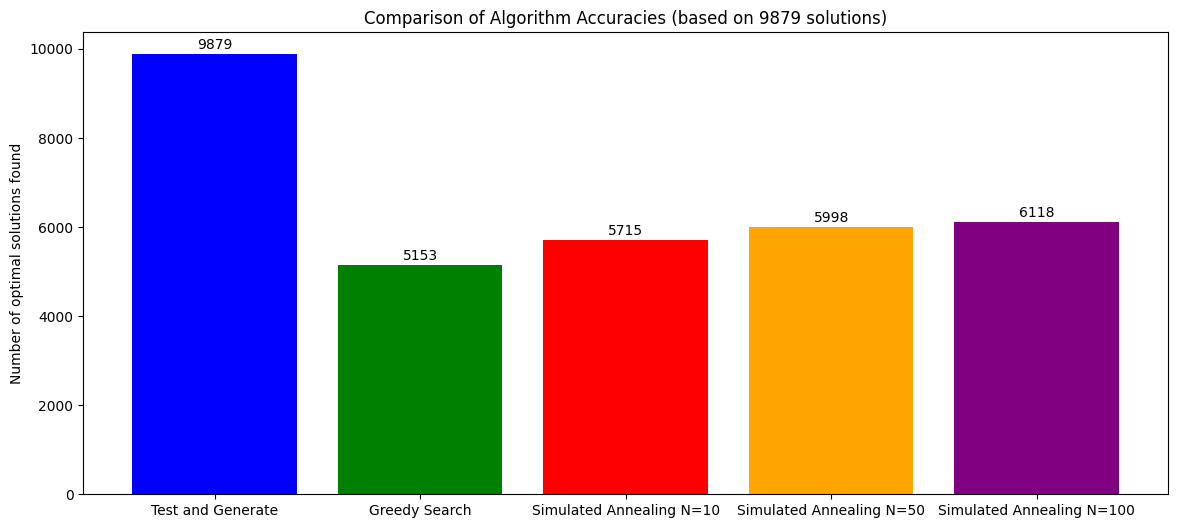

In [34]:
algorithms = ["Test and Generate", "Greedy Search", "Simulated Annealing N=10", "Simulated Annealing N=50", "Simulated Annealing N=100"]
nbr_solutions = [9879, 5153, 5715, 5998, 6118]

plt.figure(figsize=(14, 6))
bars = plt.bar(algorithms, nbr_solutions, color=["blue", "green", "red", "orange", "purple"])
# Add the actual numbers on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')
plt.title("Comparison of Algorithm Accuracies (based on 9879 solutions)")
plt.ylabel("Number of optimal solutions found")
plt.show()

**Simulated Annealing Algorithm: (best accuracies across different numbers of iterations)**

* At N=10 iterations: Simulated Annealing found the optimal prices 5715 times, which is better than the Greedy Search but still far away from the optimal accuracy that "Test and Generate" algorithm have found. However, even with a small number of iterations, the Simulated Annealing search already performs better than the Greedy Search.

* At N=50 iterations: The performance improves further to 5998 optimal solutions, suggesting that increasing the iterations in Simulated Annealing improves its accuracy. It's approaching the performance of "Test and Generate".

* At N=100 iterations: The performance reaches 6118 optimal solutions. While this is the best performance for Simulated Annealing among the three iteration levels, it's still way below the "Test and Generate" method.

***d. Genetic Algorithm***



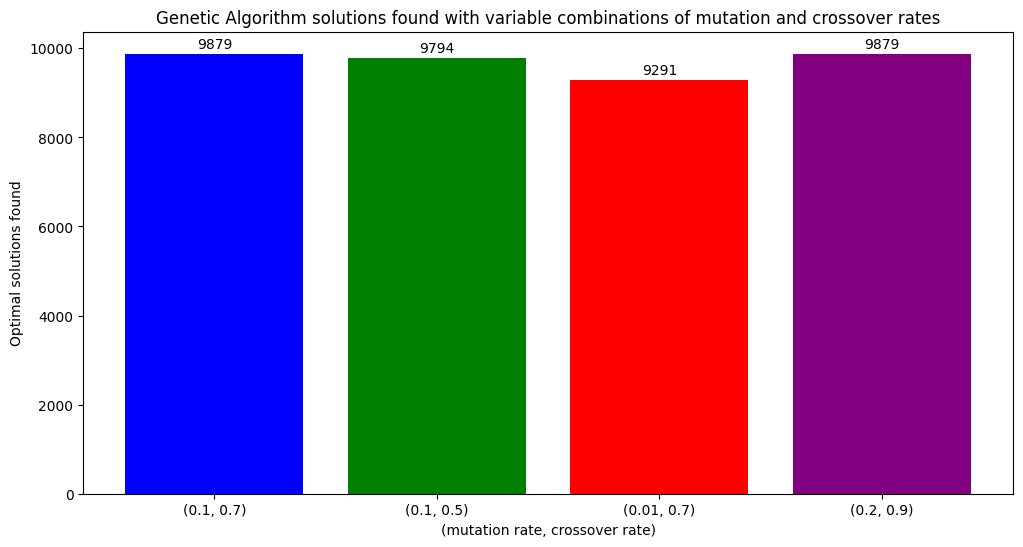

In [33]:
experiments = ["(0.1, 0.7)", "(0.1, 0.5)", "(0.01, 0.7)", "(0.2, 0.9)"]
accuracies = [9879, 9794, 9291, 9879]

plt.figure(figsize=(12, 6))
bars = plt.bar(experiments, accuracies, color=["blue", "green", "red", "purple"])
# Add the actual accuracies on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')
plt.xlabel("(mutation rate, crossover rate)")
plt.ylabel("Optimal solutions found")
plt.title("Genetic Algorithm solutions found with variable combinations of mutation and crossover rates")
plt.show()

* (mut_rate, cross_rate) = (0.1, 0.7): With a mutation rate of 0.1 and crossover rate of 0.7, the result is 9869, which is almost the highest score among the four.

* (mut_rate, cross_rate) = (0.1, 0.5): The same mutation rate as the first experiment but with a reduced crossover rate of 0.5 leads to a slightly lower result of 9794.

* (mut_rate, cross_rate) = (0.01, 0.7): A significant decrease in the mutation rate (while maintaining the crossover rate of 0.7) results in the lowest score of 9291 among the experiments. This is due to the fact that mutations are minimal.

* (mut_rate, cross_rate) = (0.2, 0.9): Increasing both mutation and crossover rates to 0.2 and 0.9, respectively, yielded the optimal score of 9879. Higher rates means more opportuniy for the Genetic Algrithm to explore.

Higher mutation and crossover rates provided the best results by the Genetic Algorithm. However, it's notable that the performance is sensitive to the balance of mutation and crossover rates, with significant drops observed when the balance isn't optimal.

***e. Genetic Algorithm vs Simulated annealment vs Greedy Search vs Generate and Test***

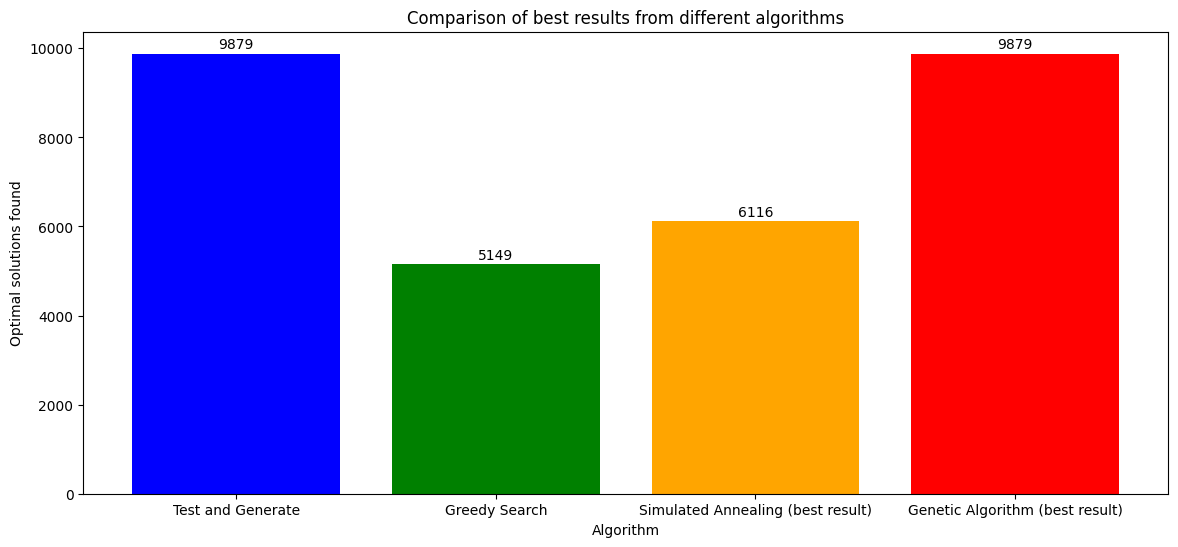

In [32]:
algorithms = ["Test and Generate", "Greedy Search", "Simulated Annealing (best result)", "Genetic Algorithm (best result)"]
nbr_solutions = [9879, 5149, 6116, 9879]

plt.figure(figsize=(14,6))
bars = plt.bar(algorithms, nbr_solutions, color=["blue", "green", "orange", "red"])
# Add the actual accuracies on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha="center", va="bottom")
plt.title("Comparison of best results from different algorithms")
plt.ylabel("Optimal solutions found")
plt.xlabel("Algorithm")
plt.show()


* Both the Test and Generate and the Genetic Algorithm have achieved the highest and identical performance score of 9879.
This shows the capability of the genetic algorithm of reaching optimal results. It could be due to the multiple iterations that happen to find the optimal result

* The Simulated Annealing method, at its best configuration, scored 6116, which is notably below the top-performing algorithms.

* Meanwhile, the Greedy Search falls behind with a score of 5149. This lower score implies potential limitations in its strategy. Yet the Simulated annealing search demonstrated its optimization capabilities despite the underperforming Greedy Search.

**9. Conclusions**

* The Genetic Algorithm, using its probabilistic approach, effectively found all optimal solutions, though it was time-consuming and sensitive to rates adjustments. Remarkably, randomness led it to optimal outcomes.

* The Greedy Search, with its direct approach, quickly identified over half of the correct solutions.

* Meanwhile, Simulated Annealing impressively optimized the Greedy Search's findings, surpassing expectations.

While it's premature to draw final conclusions, given that both greedy and probabilistic algorithms demand extensive data, rates fine-tuning, and numerous trials, exploring and experimenting with these algorithms was fun.

The next step would be refine the Greedy Search strategy and adjust the parameters to enhance the results of probabilistic methods.



**10. References**

[1] GeeksForGeeks. "Generate and Test Search"
Retreived on September 23th, 2023 from:  
https://www.geeksforgeeks.org/generate-and-test-search/

[2] Wikipedia. "Annealing (materials science)"
Retreived on September 27th, 2023 from:
https://en.wikipedia.org/wiki/Annealing_(materials_science)

[3] Slide 23 - Automne2023-CSI4506-RecherchePopulations -  
Semaine 3 - Espaces de solutions et Recherche avec adversaire
Retreived on September 27th, 2023 from:
https://uottawa.brightspace.com/d2l/le/content/392262/viewContent/5542593/View

[4] GeeksForGeeks. "Python List Slicing"
Retreived on September 28th, 2023 from:
https://www.geeksforgeeks.org/python-list-slicing/

[5] MathWorks. "What Is the Genetic Algorithm?"
Retreived on September 28th, 2023 from:
https://www.mathworks.com/help/gads/what-is-the-genetic-algorithm.html

[6] StackOverflow. "python max function using 'key' and lambda expression"
Retreived on September 29th, 2023 from:
https://stackoverflow.com/questions/18296755/python-max-function-using-key-and-lambda-expression

[7] YouTube. "The Knapsack Problem & Genetic Algorithms - Computerphile"
Retreived on September 29th, 2023 from:
https://www.youtube.com/watch?v=MacVqujSXWE&t=570s

[8] Colab. "Charts in Colaboratory - Line Plots"
Retreived on September 29th, 2023 from:
https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=WALI8x49GUpe

[9] Colab. "Charts in Colaboratory - Bar Plots"
Retreived on September 29th, 2023 from:
https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=sIZLTZ0pdo0Z

[10] GeeksForGeeks. "Adding value labels on a Matplotlib Bar Chart"
Retreived on October 1th, 2023 from:
https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

[11] StackOverflow. Sorting list according to corresponding values from a parallel list
Retreived on September 28th, 2023 from:
https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list

**Thanks!**